In [48]:
#Yanyi Wu 1003775104
#INF 2178 Final Project
#Professor Shion Guha
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random # random library
pallete = ['Accent_r', 'Blues', 'BrBG'
           , 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'twilight']

sns.set_style("ticks")

In [49]:
#Read file
df=pd.read_csv('D:/U of T/Winter 2022/INF 2178/Midterm/diabetes.csv')
#df=df.drop(columns=['SkinThickness'])

In [50]:
#File Overview
df.describe().transpose()

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [51]:
#Boxplot Diagram
df.info()
plt.figure(figsize=(14,8))
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']) 
plt.title('Boxplot for raw data')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Boxplot for raw data')

Text(0.5, 1.0, 'Boxplot for data after removing outliers')

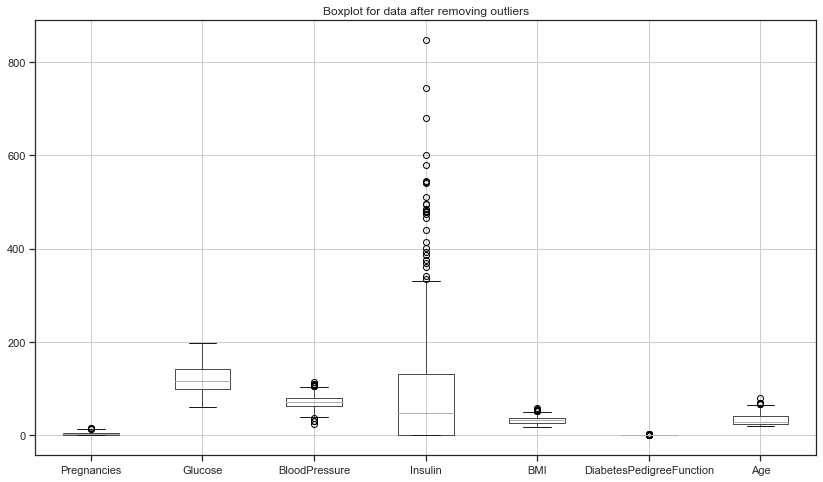

In [52]:
df=df[df.BMI > df.BMI.quantile(.01)]
df=df[df.BMI < df.BMI.quantile(.999)]
df=df[df.Glucose > df.Glucose.quantile(.01)]
df=df[df.Glucose < df.Glucose.quantile(.999)]
df=df[df.BloodPressure > df.BloodPressure.quantile(.01)]
df=df[df.BloodPressure < df.BloodPressure.quantile(.999)]

plt.figure(figsize=(14,8))
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']) 
plt.title('Boxplot for data after removing outliers')

In [53]:
len(df)

717

<AxesSubplot:xlabel='Outcome', ylabel='count'>

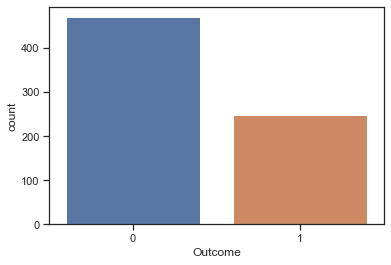

In [54]:
#Different Outcome Count
sns.countplot(x="Outcome", data=df)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

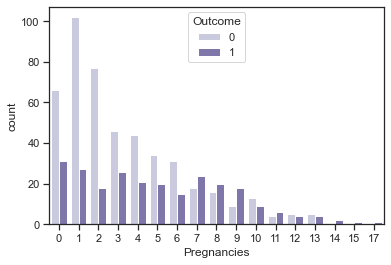

In [55]:
sns.countplot(x="Pregnancies", hue = "Outcome", data=df, palette=random.choice(pallete))

In [56]:
#Check Unique Values
uniques = []

for col in df.columns:
    num_uniques = df[col].nunique()
    pct_uniques = round((num_uniques / len(df[col])) * 100,2)
    temp_list = [col, num_uniques, pct_uniques]
    uniques.append(temp_list)

In [57]:
from tabulate import tabulate
print(tabulate(uniques, headers=['Column', 'Number of Unique Values', 'Percentage of Unique Values']))

Column                      Number of Unique Values    Percentage of Unique Values
------------------------  -------------------------  -----------------------------
Pregnancies                                      17                           2.37
Glucose                                         131                          18.27
BloodPressure                                    45                           6.28
SkinThickness                                    51                           7.11
Insulin                                         185                          25.8
BMI                                             243                          33.89
DiabetesPedigreeFunction                        494                          68.9
Age                                              51                           7.11
Outcome                                           2                           0.28


In [58]:
#Check and Drop Repeated Column
df = df.drop_duplicates(df.columns, keep = 'last')
sum(df.duplicated(df.columns))

0

In [59]:
#Check the missing Data
print("Percentage of Missing Data:")
for i in df.columns:
    print(str(i) + ":"+ str((round(sum(df[i].isna()) / len(df),3)*100))[:4]+'%')

Percentage of Missing Data:
Pregnancies:0.0%
Glucose:0.0%
BloodPressure:0.0%
SkinThickness:0.0%
Insulin:0.0%
BMI:0.0%
DiabetesPedigreeFunction:0.0%
Age:0.0%
Outcome:0.0%


<AxesSubplot:xlabel='Age', ylabel='Count'>

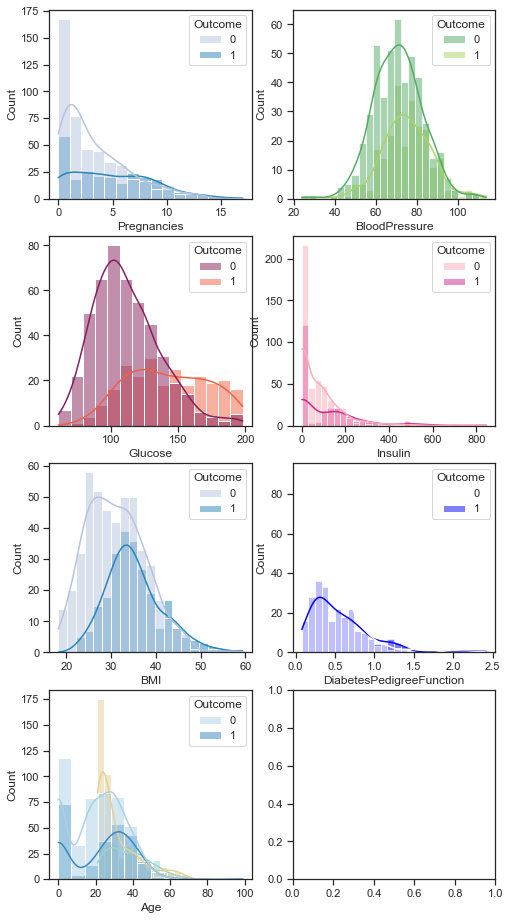

In [60]:
#Hisplot for all variables
fig, ax = plt.subplots(4,2, figsize=(8,16))
sns.histplot(x="Pregnancies", hue="Outcome", data=df, kde=True, palette=random.choice(pallete),ax=ax[0,0])
sns.histplot(x="BloodPressure", hue="Outcome", data=df, kde=True, palette=random.choice(pallete), ax=ax[0,1]) 
sns.histplot(x="Glucose", hue="Outcome", data=df, kde=True, palette=random.choice(pallete),ax=ax[1,0]) 
sns.histplot(x="Insulin", hue="Outcome", data=df, kde=True, palette=random.choice(pallete),ax=ax[1,1]) 
sns.histplot(x="BMI", hue="Outcome", data=df, kde=True, palette=random.choice(pallete),ax=ax[2,0])
sns.histplot(x="DiabetesPedigreeFunction", hue="Outcome", data=df, kde=True, palette=random.choice(pallete),ax=ax[2,1]) 
sns.histplot(x="Age", hue="Outcome", data=df, kde=True, palette=random.choice(pallete), ax=ax[3,0]) 
sns.histplot(x="SkinThickness", hue="Outcome", data=df, kde=True, palette=random.choice(pallete), ax=ax[3,0]) 


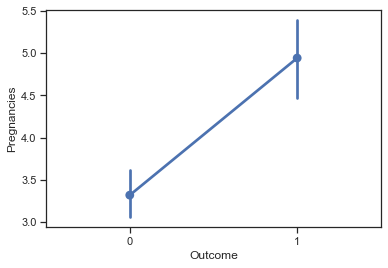

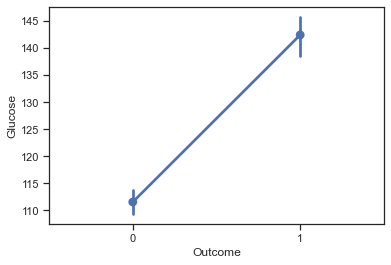

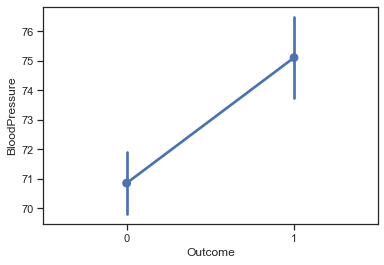

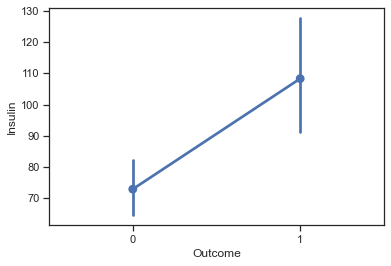

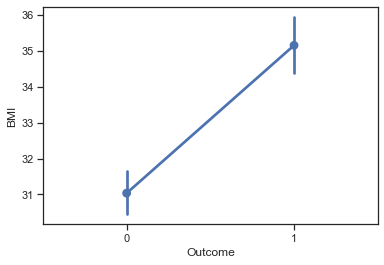

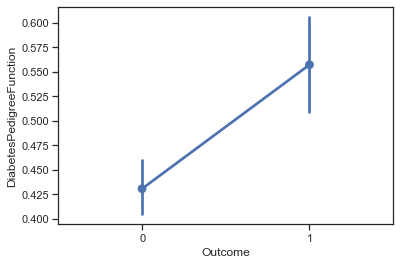

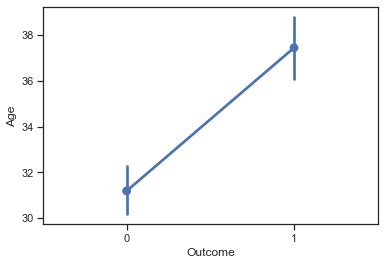

In [61]:
#PointPlot for all variables
for i in ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    sns.pointplot(x='Outcome', y= i, data=df) 
    plt.show()

<AxesSubplot:>

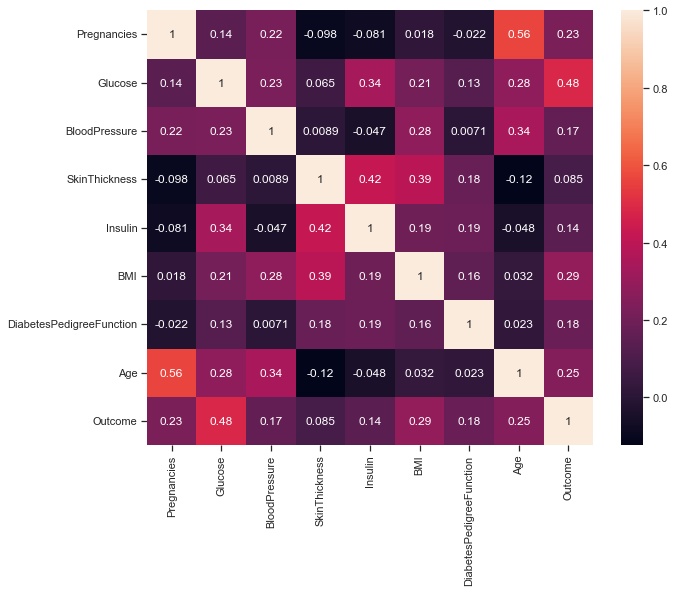

In [62]:
#Heatmap for all variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

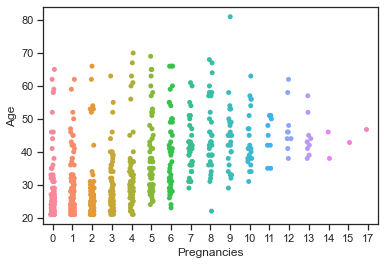

In [63]:
#Sublploe with Pregnancies and Age
sns.stripplot(x='Pregnancies',y='Age',data=df)

In [64]:
#T-Test
from scipy import stats
not_diabetes = df.query('Outcome == "0"')['Age']
diabetes = df.query('Outcome == "1"')['Age']
stats.ttest_ind(not_diabetes, diabetes, equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [65]:
df['Blood_Range']=pd.cut(df.BloodPressure,bins=[0,80,140],labels=['Normal','High Blood Pressure'])
total=df.groupby('Blood_Range').count()[['Outcome']].reset_index()
total


Blood_Range  Outcome
0               Normal      556
1  High Blood Pressure      161

Text(0, 0.5, 'Observations')

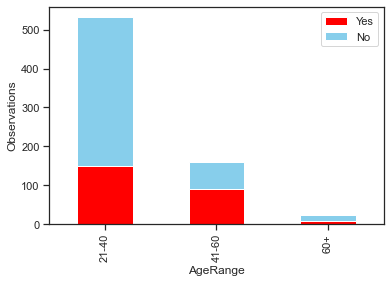

In [66]:
#Outcome count for different age group
df['AgeRange']=pd.cut(df.Age,bins=[20,40,60,81],labels=['21-40','41-60','60+'])
total=df.groupby('AgeRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('AgeRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.AgeRange
total.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.ylabel('Observations')

In [67]:
stats.f_oneway(df['Outcome'][df['AgeRange'] == '21-40'],
               df['Outcome'][df['AgeRange'] == '41-60'],
               df['Outcome'][df['AgeRange'] == '60+'])

F_onewayResult(statistic=24.408435841623117, pvalue=5.5746558534606525e-11)

Text(0, 0.5, 'Observations')

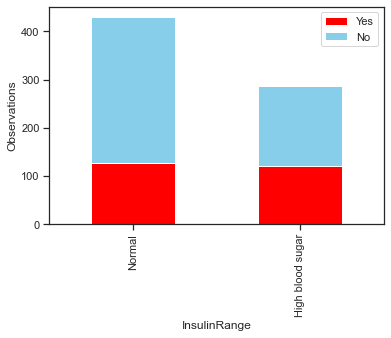

In [68]:
#Outcome count for normal and high insulin
df['InsulinRange']=pd.cut(df.Insulin,bins=[-1,80,900],labels=['Normal','High blood sugar'])
total=df.groupby('InsulinRange').count()[['Outcome']].reset_index()
total=df.groupby('InsulinRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('InsulinRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.InsulinRange
total.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.ylabel('Observations')

Text(0, 0.5, 'Observations')

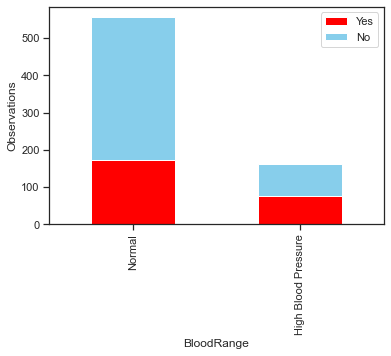

In [69]:
#Outcome for noral and high blood pressure group
df['BloodRange']=pd.cut(df.BloodPressure,bins=[0,80,140],labels=['Normal','High Blood Pressure'])
total=df.groupby('BloodRange').count()[['Outcome']].reset_index()
total=df.groupby('BloodRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('BloodRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.BloodRange
total.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.ylabel('Observations')

Text(0, 0.5, 'Observations')

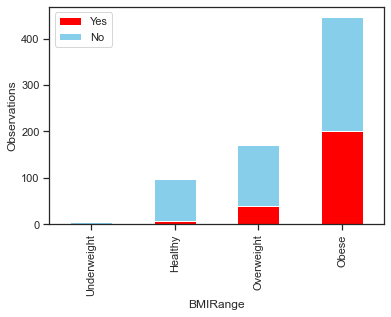

In [70]:
df['BMIRange']=pd.cut(df.BMI,bins=[0,18.5,25,30,100],labels=['Underweight','Healthy','Overweight','Obese'])
total=df.groupby('BMIRange').count()[['Outcome']].reset_index()
total=df.groupby('BMIRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('BMIRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.BMIRange
total.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.ylabel('Observations')

In [71]:
#T-test of BMI
s1 = df[df.Outcome == 1].BMI
s2 = df[df.Outcome == 0].BMI

tStat1,pVal1 = stats.ttest_ind(s1,s2,equal_var = False)

print("P-value: {0} T-statistics: {1}".format(pVal1,tStat1))

P-value: 1.6953034332030706e-15 T-statistics: 8.214887633455715


In [72]:
#Linear Regression 
y=df['Outcome']
X=df[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [73]:
df.to_csv('tidy.csv')

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [75]:
model=ols(formula='Outcome~Pregnancies+Glucose+BloodPressure+Insulin+BMI+DiabetesPedigreeFunction+Age',data=df)



In [76]:
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     46.25
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           5.04e-54
Time:                        19:12:21   Log-Likelihood:                -349.09
No. Observations:                 717   AIC:                             714.2
Df Residuals:                     709   BIC:                             750.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.0139      0.108     -9.372      0.000      -1.226      -0.801
Pregnancies                  0.0200      0.005      3.737      0.000       0.009       0.030
Glucose                      0.0065      0.001     11.640      0.000       0.005       0.008
BloodPressure               -0.0015      0.001     -1.106      0.269      -0.004       0.001
Insulin                     -0.0002      0.000     -1.227      0.220      -0.000       0.000
BMI                          0.0141      0.002      5.924      0.000       0.009       0.019
DiabetesPedigreeFunction     0.1528      0.046      3.328      0.001       0.063       0.243
Age                          0.0024      0.002      1.486      0.138      -0.001       0.006
==============================================================================
Omnibus:                       29.986   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.045
Skew:                           0.345   Prob(JB):                     9.91e-06
Kurtosis:                       2.457   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
sm.stats.anova_lm(res, typ=2)

sum_sq     df           F        PR(>F)
Pregnancies                 2.189385    1.0   13.964590  2.012783e-04
Glucose                    21.243637    1.0  135.498612  8.819064e-29
BloodPressure               0.191608    1.0    1.222135  2.693171e-01
Insulin                     0.235910    1.0    1.504709  2.203554e-01
BMI                         5.501663    1.0   35.091341  4.905598e-09
DiabetesPedigreeFunction    1.736198    1.0   11.074015  9.206638e-04
Age                         0.346229    1.0    2.208357  1.377093e-01
Residual                  111.157880  709.0         NaN           NaN

In [32]:
model=ols(formula='Outcome~C(BloodRange)+C(InsulinRange)+C(AgeRange)+C(BMIRange)',data=df)
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     18.46
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.18e-22
Time:                        18:12:19   Log-Likelihood:                -423.91
No. Observations:                 717   AIC:                             863.8
Df Residuals:                     709   BIC:                             900.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.0221      0.220     -0.100      0.920      -0.454       0.410
C(BloodRange)[T.High Blood Pressure]     0.0639      0.041      1.574      0.116      -0.016       0.144
C(InsulinRange)[T.High blood sugar]      0.0883      0.034      2.569      0.010       0.021       0.156
C(AgeRange)[T.41-60]                     0.2568      0.040      6.352      0.000       0.177       0.336
C(AgeRange)[T.60+]                       0.0454      0.093      0.487      0.626      -0.138       0.228
C(BMIRange)[T.Healthy]                   0.0190      0.224      0.085      0.932      -0.422       0.460
C(BMIRange)[T.Overweight]                0.1665      0.223      0.748      0.455      -0.271       0.604
C(BMIRange)[T.Obese]                     0.3472      0.221      1.569      0.117      -0.087       0.782
==============================================================================
Omnibus:                      445.636   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.595
Skew:                           0.458   Prob(JB):                     3.46e-15
Kurtosis:                       1.822   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
sm.stats.anova_lm(res, typ=2)

sum_sq     df          F        PR(>F)
C(BloodRange)      0.478629    1.0   2.477809  1.159091e-01
C(InsulinRange)    1.274965    1.0   6.600360  1.039921e-02
C(AgeRange)        7.803263    2.0  20.198329  2.942892e-09
C(BMIRange)       10.061861    3.0  17.363060  6.896910e-11
Residual         136.954725  709.0        NaN           NaN

In [34]:
df['BloodRange']=pd.cut(df.BloodPressure,bins=[0,80,140],labels=['Normal','High Blood Pressure'])
total=df.groupby('BloodRange').count()[['Outcome']].reset_index()
total


BloodRange  Outcome
0               Normal      556
1  High Blood Pressure      161

In [35]:
model=ols(formula='Outcome~Pregnancies+Glucose+C(BloodRange)+C(InsulinRange)+BMIRange+DiabetesPedigreeFunction+C(AgeRange)',data=df)


In [36]:
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     34.70
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           4.07e-55
Time:                        18:12:30   Log-Likelihood:                -340.58
No. Observations:                 717   AIC:                             703.2
Df Residuals:                     706   BIC:                             753.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.6883      0.202     -3.399      0.001      -1.086      -0.291
C(BloodRange)[T.High Blood Pressure]    -0.0063      0.037     -0.173      0.863      -0.078       0.066
C(InsulinRange)[T.High blood sugar]     -0.0251      0.032     -0.782      0.435      -0.088       0.038
BMIRange[T.Healthy]                     -0.0871      0.201     -0.434      0.664      -0.481       0.307
BMIRange[T.Overweight]                   0.0199      0.199      0.100      0.920      -0.371       0.411
BMIRange[T.Obese]                        0.1623      0.198      0.819      0.413      -0.227       0.551
C(AgeRange)[T.41-60]                     0.1232      0.042      2.949      0.003       0.041       0.205
C(AgeRange)[T.60+]                      -0.1501      0.085     -1.769      0.077      -0.317       0.016
Pregnancies                              0.0157      0.005      3.086      0.002       0.006       0.026
Glucose                                  0.0065      0.001     12.181      0.000       0.005       0.008
DiabetesPedigreeFunction                 0.1627      0.045      3.608      0.000       0.074       0.251
==============================================================================
Omnibus:                       22.635   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.592
Skew:                           0.337   Prob(JB):                     5.57e-05
Kurtosis:                       2.552   Cond. No.                     3.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
import pingouin

In [78]:
from pingouin import ancova

In [79]:
#Ancova Analysis
ancova(data=df, dv='Outcome', covar='Glucose', between='AgeRange')

Source          SS   DF           F         p-unc
0  AgeRange    5.612559    2   16.918479  6.628558e-08
1   Glucose   33.283218    1  200.657655  2.566701e-40
2  Residual  118.265782  713         NaN           NaN

In [80]:
ancova(data=df, dv='Outcome', covar='Glucose', between='BloodRange')

Source          SS   DF           F         p-unc
0  BloodRange    0.349359    1    2.019316  1.557457e-01
1     Glucose   35.325018    1  204.180967  6.370346e-41
2    Residual  123.527982  714         NaN           NaN

In [41]:
ancova(data=df, dv='Outcome', covar='Glucose', between='InsulinRange')

Source          SS   DF           F         p-unc
0  InsulinRange    0.000912    1    0.005256  9.422247e-01
1       Glucose   35.439571    1  204.266898  6.160036e-41
2      Residual  123.876429  714         NaN           NaN

In [42]:
import numpy as np

from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

In [43]:
# variables for power analysis

effect_size = 0.7

alpha = 0.05

power = 0.9

p_analysis = TTestIndPower()

sample_size = p_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

print("Required Sample Size: " + str(sample_size))

Required Sample Size: 43.87040750089834


<Figure size 432x288 with 0 Axes>

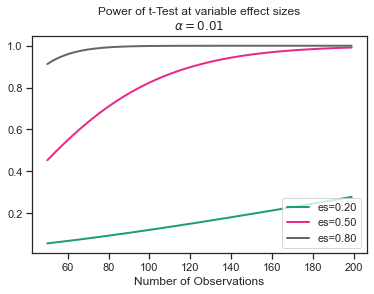

In [44]:

fig = plt.figure()

fig = TTestIndPower().plot_power(dep_var='nobs',

                                nobs= np.arange(50, 200),

                                effect_size=np.array([0.2, 0.5, 0.8]),

                                alpha=0.01,

                                title='Power of t-Test at variable effect sizes\n' + r'$\alpha = 0.01$')

plt.show()